In [1]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pd
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [2]:
# Load the different files
df_marketing = pd.DataFrame(pd.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pd.DataFrame(pd.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

In [3]:
df_clients.shape

(100000, 7)

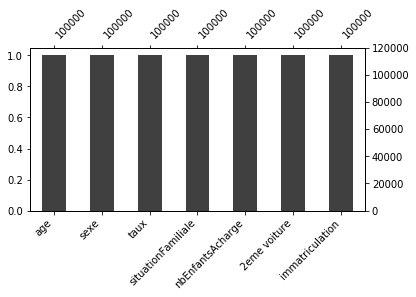

In [4]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [5]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pd.get_dummies(df_clients['sexe'])
df_clients = pd.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [6]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pd.get_dummies(df_clients['situationFamiliale'])
df_clients = pd.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [7]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [8]:
#df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [9]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [10]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [11]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?') & (df_clients.taux != '-1'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


In [12]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?') & (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?', '-1'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


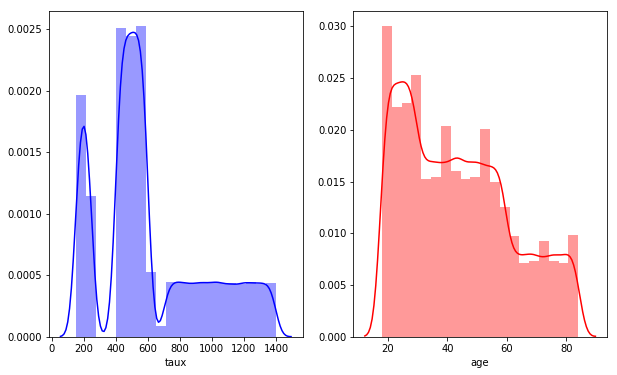

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [14]:
df_imma_copy = df_clients['immatriculation'].copy()
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [15]:
df_clients.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,43.710880,609.807481,1.25189,0.130750,0.297490,0.699420,0.353500,0.63994,0.006560
std,18.216331,334.599826,1.39054,0.337128,0.457156,0.458513,0.478059,0.48002,0.080728
min,18.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,28.000000,422.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,42.000000,523.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
75%,56.000000,826.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,84.000000,1399.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000E43AC3C50>], dtype=object)

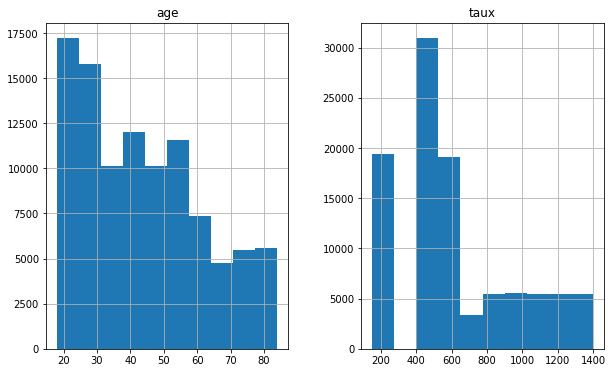

In [16]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()

df_clients.hist(column="age", ax=ax1)
df_clients.hist(column="taux", ax=ax2)

In [17]:
#df_clients['age'] = pan.qcut(df_clients['age'],5,labels=[0,1,2,3,4]).astype(int)
#df_clients['taux'] = pan.qcut(df_clients['taux'],5,labels=[0,1,2,3,4]).astype(int)

print(df_clients['age'].value_counts())
print(df_clients['taux'].value_counts())

29    2527
19    2525
20    2497
28    2488
26    2487
27    2483
24    2481
25    2475
21    2447
18    2433
23    2424
22    2409
43    1978
59    1767
35    1754
49    1722
40    1714
39    1708
45    1699
50    1699
36    1689
47    1684
33    1683
52    1679
51    1675
32    1674
31    1673
56    1672
38    1671
48    1670
      ... 
54    1634
41    1628
53    1628
58    1618
57    1612
76     866
81     837
80     828
61     827
69     822
68     818
82     818
64     807
66     802
62     802
83     801
73     798
84     797
67     796
70     786
77     784
63     779
74     772
75     763
79     760
71     759
78     753
60     752
65     751
72     731
Name: age, Length: 67, dtype: int64
544.0     295
448.0     284
555.0     282
402.0     282
509.0     279
521.0     278
497.0     277
501.0     277
576.0     275
586.0     275
453.0     273
439.0     272
546.0     272
424.0     271
590.0     271
455.0     271
577.0     271
423.0     270
572.0     270
594.0     269
409.0     269

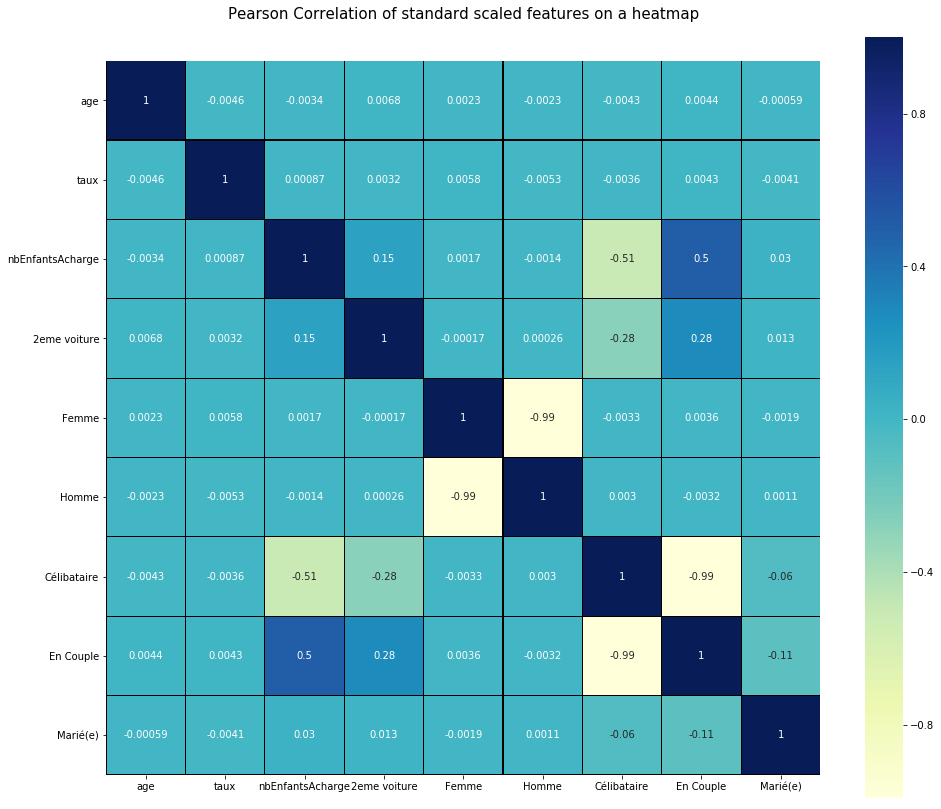

In [18]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(16, 14))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='black', annot=True, cmap="YlGnBu")

In [19]:
df_clients.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [20]:
df_clients = pd.concat([df_clients, df_imma_copy], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation
0,44,476.0,0,0,0,1,0,1,0,3176 TS 67
1,20,422.0,2,0,0,1,0,1,0,3721 QS 49
2,49,221.0,0,0,1,0,1,0,0,9099 UV 26
3,57,246.0,0,0,0,1,1,0,0,3563 LA 55
4,58,1149.0,0,0,0,1,1,0,0,6963 AX 34


In [21]:
df_imma_cluster = pd.DataFrame(pd.read_csv('../input/immatriculation_and_cluster.csv', encoding="ISO-8859-1"))
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,3
1,3721 QS 49,1
2,9099 UV 26,3
3,3563 LA 55,0
4,6963 AX 34,0


In [22]:
# ajout du cluster de leur véhicule
df_clients = df_clients.merge(df_imma_cluster, left_on="immatriculation", right_on="immatriculation", how="inner")
df_clients = df_clients.drop(['immatriculation'], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster_predicted
0,44,476.0,0,0,0,1,0,1,0,3
1,20,422.0,2,0,0,1,0,1,0,1
2,49,221.0,0,0,1,0,1,0,0,3
3,57,246.0,0,0,0,1,1,0,0,0
4,58,1149.0,0,0,0,1,1,0,0,0


In [23]:
# Application du nettoyage de la data sur le dataframe marketing

df_marketing['sexe'] = df_marketing['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeMarketing = pd.get_dummies(df_marketing['sexe'])
df_marketing = pd.concat([df_marketing, dfSexeMarketing], axis=1).drop(['sexe'] , axis=1)

df_marketing['situationFamiliale'] = df_marketing['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeMarketing = pd.get_dummies(df_marketing['situationFamiliale'])
df_marketing = pd.concat([df_marketing, dfSituationFamillialeMarketing], axis=1).drop(['situationFamiliale'] , axis=1)

df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['true'], 1).astype(np.int64)
df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['false', ' ', '?'], 0).astype(np.int64)

df_marketing['nbEnfantsAcharge'] = df_marketing['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_marketing['taux'] = df_marketing['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_marketing['taux'] = df_marketing['taux'].astype(np.float64)

df_marketing['age'] = df_marketing['age'].replace([' ', '?', '-1'], meanAgeClients)
df_marketing['age'] = df_marketing['age'].astype(np.int64)

df_marketing['Marié(e)'] = 0
df_marketing['Marié(e)'] = df_marketing['Marié(e)'].astype(np.uint8)

df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,21,1396.0,0,0,1,0,1,0,0
1,35,223.0,0,0,0,1,1,0,0
2,48,401.0,0,0,0,1,1,0,0
3,26,420.0,3,1,1,0,0,1,0
4,80,530.0,3,0,0,1,0,1,0


In [24]:
df_marketing.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [25]:
## On découpe notre df de train entre les datas

df_client_cluster_pred_copy = df_clients['cluster_predicted'].copy()
df_clients = df_clients.drop(['cluster_predicted'], axis=1)

column_save = df_clients.columns

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [26]:
df_client_cluster_pred_copy.value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         1
2         3
3         0
4         0
5         4
6         3
7         0
8         0
9         0
10        0
11        4
12        0
13        1
14        3
15        4
16        4
17        2
18        0
19        3
20        2
21        4
22        3
23        3
24        3
25        2
26        2
27        0
28        0
29        2
         ..
100297    1
100298    3
100299    0
100300    3
100301    4
100302    0
100303    1
100304    4
100305    4
100306    1
100307    3
100308    3
100309    2
100310    3
100311    0
100312    0
100313    1
100314    3
100315    2
100316    3
100317    3
100318    0
100319    3
100320    0
100321    4
100322    2
100323    0
100324    0
100325    1
100326    0
Name: cluster_predicted, Length: 100327, dtype: int64>

In [27]:
## on normalise la data avant d'appliquer un algo dessus

from sklearn.preprocessing import StandardScaler

#mat_clients = df_clients.as_matrix()
#mat_marketing = df_marketing.as_matrix()

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df_clients)

data_clients = scaler.transform(df_clients)
data_marketing = scaler.transform(df_marketing)

data_marketing

array([[-1.24647707,  2.35013892, -0.90019105, -0.38777247,  1.53664041,
        -1.52535656,  1.35236893, -1.3332099 , -0.08118961],
       [-0.47792315, -1.15594387, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [ 0.23573405, -0.62390403, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [-0.97199353, -0.56711326,  1.25749312,  2.57883184,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 1.9924287 , -0.23832459,  1.25749312, -0.38777247, -0.65077034,
         0.65558442, -0.73944319,  0.75006944, -0.08118961],
       [-0.91709682, -1.36517302,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 0.83959784, -0.1127871 ,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [-0.03874949, -0.53423439, -0.90019105, -0.38777247,  1

In [28]:
## on les remets en df panda pour taffer dessus

df_marketing_copy = df_marketing.copy()

df_clients   = pd.DataFrame(data_clients, columns=column_save)
df_marketing = pd.DataFrame(data_marketing, columns=column_save)

In [29]:
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,0.016147,-0.399730,-0.900191,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
1,-1.301374,-0.561135,0.538265,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
2,0.290631,-1.161922,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
3,0.729804,-1.087197,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
4,0.784701,1.611859,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119


In [30]:
df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,-1.246477,2.350139,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
1,-0.477923,-1.155944,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
2,0.235734,-0.623904,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
3,-0.971994,-0.567113,1.257493,2.578832,1.53664,-1.525357,-0.739443,0.750069,-0.08119
4,1.992429,-0.238325,1.257493,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119


In [31]:
df_marketing.shape

(20, 9)

In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# CatBoostClassifier function
def runCatBoostClassifier(x_train, y_train, x_test, depth):
    
    # init classification variable
    #classif_report = 0
    
    # init CatBoostClassifier
    model=CatBoostClassifier(iterations=4000,
                            learning_rate=0.02,
                            depth=depth 
                            ,loss_function="MultiClass",
                            #od_type="IncToDec",
                            #od_pval=1,
                            #od_wait=400
                            )
    
    # fit the model
    model.fit(x_train, y_train)
    # predit output
    y_test = model.predict(x_test)
    
    # build dataframe for classification report
    #y_pred = model.predict(x_train)
    
    # build classification report
    #classif_report = classification_report(y_train_cr, y_pred)
    
    return y_test

In [33]:
# run the catboostclassifier
marketing_cluster_pred = runCatBoostClassifier(df_clients, df_client_cluster_pred_copy, df_marketing, 8)

0:	learn: -1.5721214	total: 159ms	remaining: 10m 36s
1:	learn: -1.5374561	total: 273ms	remaining: 9m 5s
2:	learn: -1.5051069	total: 394ms	remaining: 8m 45s
3:	learn: -1.4748027	total: 516ms	remaining: 8m 35s
4:	learn: -1.4464788	total: 632ms	remaining: 8m 25s
5:	learn: -1.4196176	total: 761ms	remaining: 8m 26s
6:	learn: -1.3943946	total: 886ms	remaining: 8m 25s
7:	learn: -1.3703427	total: 998ms	remaining: 8m 17s
8:	learn: -1.3475175	total: 1.12s	remaining: 8m 16s
9:	learn: -1.3259534	total: 1.24s	remaining: 8m 12s
10:	learn: -1.3052803	total: 1.35s	remaining: 8m 9s
11:	learn: -1.2856544	total: 1.48s	remaining: 8m 10s
12:	learn: -1.2668200	total: 1.59s	remaining: 8m 6s
13:	learn: -1.2488111	total: 1.7s	remaining: 8m 3s
14:	learn: -1.2315719	total: 1.82s	remaining: 8m 4s
15:	learn: -1.2150517	total: 1.94s	remaining: 8m 1s
16:	learn: -1.1992049	total: 2.05s	remaining: 8m
17:	learn: -1.1839903	total: 2.23s	remaining: 8m 12s
18:	learn: -1.1694579	total: 2.37s	remaining: 8m 15s
19:	learn: -1

156:	learn: -0.6917853	total: 19.9s	remaining: 8m 7s
157:	learn: -0.6914946	total: 20s	remaining: 8m 7s
158:	learn: -0.6910865	total: 20.2s	remaining: 8m 7s
159:	learn: -0.6906771	total: 20.4s	remaining: 8m 8s
160:	learn: -0.6902548	total: 20.5s	remaining: 8m 8s
161:	learn: -0.6899197	total: 20.6s	remaining: 8m 7s
162:	learn: -0.6894907	total: 20.7s	remaining: 8m 7s
163:	learn: -0.6890692	total: 20.8s	remaining: 8m 6s
164:	learn: -0.6887204	total: 20.9s	remaining: 8m 6s
165:	learn: -0.6883899	total: 21s	remaining: 8m 5s
166:	learn: -0.6880199	total: 21.1s	remaining: 8m 5s
167:	learn: -0.6876349	total: 21.3s	remaining: 8m 4s
168:	learn: -0.6873171	total: 21.4s	remaining: 8m 4s
169:	learn: -0.6869941	total: 21.5s	remaining: 8m 4s
170:	learn: -0.6866583	total: 21.6s	remaining: 8m 3s
171:	learn: -0.6863218	total: 21.7s	remaining: 8m 3s
172:	learn: -0.6860262	total: 21.8s	remaining: 8m 3s
173:	learn: -0.6857409	total: 22s	remaining: 8m 2s
174:	learn: -0.6854390	total: 22.1s	remaining: 8m 2s

310:	learn: -0.6706293	total: 39.1s	remaining: 7m 43s
311:	learn: -0.6705923	total: 39.3s	remaining: 7m 44s
312:	learn: -0.6705501	total: 39.4s	remaining: 7m 43s
313:	learn: -0.6705054	total: 39.5s	remaining: 7m 44s
314:	learn: -0.6704576	total: 39.7s	remaining: 7m 44s
315:	learn: -0.6703807	total: 39.8s	remaining: 7m 43s
316:	learn: -0.6703310	total: 39.9s	remaining: 7m 44s
317:	learn: -0.6702913	total: 40.1s	remaining: 7m 44s
318:	learn: -0.6702501	total: 40.2s	remaining: 7m 44s
319:	learn: -0.6702186	total: 40.3s	remaining: 7m 43s
320:	learn: -0.6701443	total: 40.5s	remaining: 7m 43s
321:	learn: -0.6701031	total: 40.6s	remaining: 7m 43s
322:	learn: -0.6700652	total: 40.7s	remaining: 7m 43s
323:	learn: -0.6700275	total: 40.8s	remaining: 7m 43s
324:	learn: -0.6699830	total: 41s	remaining: 7m 43s
325:	learn: -0.6699510	total: 41.1s	remaining: 7m 43s
326:	learn: -0.6699185	total: 41.3s	remaining: 7m 43s
327:	learn: -0.6698872	total: 41.4s	remaining: 7m 43s
328:	learn: -0.6698208	total: 

464:	learn: -0.6652087	total: 1m	remaining: 7m 42s
465:	learn: -0.6651869	total: 1m	remaining: 7m 42s
466:	learn: -0.6651645	total: 1m 1s	remaining: 7m 42s
467:	learn: -0.6651474	total: 1m 1s	remaining: 7m 42s
468:	learn: -0.6651232	total: 1m 1s	remaining: 7m 42s
469:	learn: -0.6651068	total: 1m 1s	remaining: 7m 42s
470:	learn: -0.6650766	total: 1m 1s	remaining: 7m 42s
471:	learn: -0.6650610	total: 1m 1s	remaining: 7m 42s
472:	learn: -0.6650447	total: 1m 2s	remaining: 7m 42s
473:	learn: -0.6650172	total: 1m 2s	remaining: 7m 42s
474:	learn: -0.6649903	total: 1m 2s	remaining: 7m 42s
475:	learn: -0.6649653	total: 1m 2s	remaining: 7m 42s
476:	learn: -0.6649369	total: 1m 2s	remaining: 7m 42s
477:	learn: -0.6649148	total: 1m 2s	remaining: 7m 42s
478:	learn: -0.6648876	total: 1m 2s	remaining: 7m 41s
479:	learn: -0.6648615	total: 1m 2s	remaining: 7m 41s
480:	learn: -0.6648370	total: 1m 3s	remaining: 7m 41s
481:	learn: -0.6648012	total: 1m 3s	remaining: 7m 42s
482:	learn: -0.6647774	total: 1m 3

615:	learn: -0.6617351	total: 1m 22s	remaining: 7m 31s
616:	learn: -0.6617206	total: 1m 22s	remaining: 7m 31s
617:	learn: -0.6617023	total: 1m 22s	remaining: 7m 31s
618:	learn: -0.6616724	total: 1m 22s	remaining: 7m 31s
619:	learn: -0.6616523	total: 1m 22s	remaining: 7m 31s
620:	learn: -0.6616278	total: 1m 22s	remaining: 7m 31s
621:	learn: -0.6616102	total: 1m 23s	remaining: 7m 31s
622:	learn: -0.6615859	total: 1m 23s	remaining: 7m 31s
623:	learn: -0.6615713	total: 1m 23s	remaining: 7m 31s
624:	learn: -0.6615460	total: 1m 23s	remaining: 7m 31s
625:	learn: -0.6615240	total: 1m 23s	remaining: 7m 30s
626:	learn: -0.6615067	total: 1m 23s	remaining: 7m 30s
627:	learn: -0.6614933	total: 1m 23s	remaining: 7m 30s
628:	learn: -0.6614696	total: 1m 24s	remaining: 7m 30s
629:	learn: -0.6614459	total: 1m 24s	remaining: 7m 30s
630:	learn: -0.6614302	total: 1m 24s	remaining: 7m 30s
631:	learn: -0.6614086	total: 1m 24s	remaining: 7m 30s
632:	learn: -0.6613921	total: 1m 24s	remaining: 7m 30s
633:	learn

765:	learn: -0.6587696	total: 1m 43s	remaining: 7m 16s
766:	learn: -0.6587436	total: 1m 43s	remaining: 7m 15s
767:	learn: -0.6587226	total: 1m 43s	remaining: 7m 15s
768:	learn: -0.6586974	total: 1m 43s	remaining: 7m 15s
769:	learn: -0.6586888	total: 1m 43s	remaining: 7m 15s
770:	learn: -0.6586767	total: 1m 43s	remaining: 7m 14s
771:	learn: -0.6586592	total: 1m 43s	remaining: 7m 14s
772:	learn: -0.6586323	total: 1m 44s	remaining: 7m 14s
773:	learn: -0.6586197	total: 1m 44s	remaining: 7m 14s
774:	learn: -0.6586010	total: 1m 44s	remaining: 7m 14s
775:	learn: -0.6585882	total: 1m 44s	remaining: 7m 14s
776:	learn: -0.6585671	total: 1m 44s	remaining: 7m 13s
777:	learn: -0.6585422	total: 1m 44s	remaining: 7m 13s
778:	learn: -0.6585164	total: 1m 44s	remaining: 7m 13s
779:	learn: -0.6585025	total: 1m 44s	remaining: 7m 13s
780:	learn: -0.6584893	total: 1m 45s	remaining: 7m 13s
781:	learn: -0.6584621	total: 1m 45s	remaining: 7m 12s
782:	learn: -0.6584471	total: 1m 45s	remaining: 7m 12s
783:	learn

917:	learn: -0.6562565	total: 2m	remaining: 6m 45s
918:	learn: -0.6562331	total: 2m	remaining: 6m 45s
919:	learn: -0.6562139	total: 2m 1s	remaining: 6m 45s
920:	learn: -0.6561993	total: 2m 1s	remaining: 6m 44s
921:	learn: -0.6561862	total: 2m 1s	remaining: 6m 44s
922:	learn: -0.6561705	total: 2m 1s	remaining: 6m 44s
923:	learn: -0.6561538	total: 2m 1s	remaining: 6m 44s
924:	learn: -0.6561415	total: 2m 1s	remaining: 6m 44s
925:	learn: -0.6561136	total: 2m 1s	remaining: 6m 43s
926:	learn: -0.6560989	total: 2m 1s	remaining: 6m 43s
927:	learn: -0.6560845	total: 2m 1s	remaining: 6m 43s
928:	learn: -0.6560640	total: 2m 2s	remaining: 6m 43s
929:	learn: -0.6560474	total: 2m 2s	remaining: 6m 43s
930:	learn: -0.6560316	total: 2m 2s	remaining: 6m 43s
931:	learn: -0.6560133	total: 2m 2s	remaining: 6m 42s
932:	learn: -0.6559971	total: 2m 2s	remaining: 6m 42s
933:	learn: -0.6559790	total: 2m 2s	remaining: 6m 42s
934:	learn: -0.6559695	total: 2m 2s	remaining: 6m 42s
935:	learn: -0.6559485	total: 2m 2

1067:	learn: -0.6539545	total: 2m 20s	remaining: 6m 25s
1068:	learn: -0.6539384	total: 2m 20s	remaining: 6m 25s
1069:	learn: -0.6539253	total: 2m 20s	remaining: 6m 25s
1070:	learn: -0.6539086	total: 2m 20s	remaining: 6m 25s
1071:	learn: -0.6538927	total: 2m 21s	remaining: 6m 25s
1072:	learn: -0.6538689	total: 2m 21s	remaining: 6m 25s
1073:	learn: -0.6538521	total: 2m 21s	remaining: 6m 25s
1074:	learn: -0.6538426	total: 2m 21s	remaining: 6m 24s
1075:	learn: -0.6538317	total: 2m 21s	remaining: 6m 24s
1076:	learn: -0.6538209	total: 2m 21s	remaining: 6m 24s
1077:	learn: -0.6538129	total: 2m 21s	remaining: 6m 24s
1078:	learn: -0.6538041	total: 2m 21s	remaining: 6m 24s
1079:	learn: -0.6537832	total: 2m 22s	remaining: 6m 24s
1080:	learn: -0.6537577	total: 2m 22s	remaining: 6m 23s
1081:	learn: -0.6537463	total: 2m 22s	remaining: 6m 23s
1082:	learn: -0.6537333	total: 2m 22s	remaining: 6m 23s
1083:	learn: -0.6537191	total: 2m 22s	remaining: 6m 23s
1084:	learn: -0.6536920	total: 2m 22s	remaining:

1215:	learn: -0.6518231	total: 2m 40s	remaining: 6m 8s
1216:	learn: -0.6518088	total: 2m 40s	remaining: 6m 8s
1217:	learn: -0.6517971	total: 2m 41s	remaining: 6m 7s
1218:	learn: -0.6517872	total: 2m 41s	remaining: 6m 7s
1219:	learn: -0.6517769	total: 2m 41s	remaining: 6m 7s
1220:	learn: -0.6517675	total: 2m 41s	remaining: 6m 7s
1221:	learn: -0.6517587	total: 2m 41s	remaining: 6m 7s
1222:	learn: -0.6517414	total: 2m 41s	remaining: 6m 7s
1223:	learn: -0.6517274	total: 2m 41s	remaining: 6m 7s
1224:	learn: -0.6517114	total: 2m 41s	remaining: 6m 6s
1225:	learn: -0.6517009	total: 2m 42s	remaining: 6m 6s
1226:	learn: -0.6516860	total: 2m 42s	remaining: 6m 6s
1227:	learn: -0.6516620	total: 2m 42s	remaining: 6m 6s
1228:	learn: -0.6516532	total: 2m 42s	remaining: 6m 6s
1229:	learn: -0.6516286	total: 2m 42s	remaining: 6m 6s
1230:	learn: -0.6516179	total: 2m 42s	remaining: 6m 6s
1231:	learn: -0.6515980	total: 2m 42s	remaining: 6m 5s
1232:	learn: -0.6515767	total: 2m 42s	remaining: 6m 5s
1233:	lear

1363:	learn: -0.6498087	total: 2m 57s	remaining: 5m 43s
1364:	learn: -0.6497969	total: 2m 57s	remaining: 5m 43s
1365:	learn: -0.6497838	total: 2m 57s	remaining: 5m 43s
1366:	learn: -0.6497718	total: 2m 58s	remaining: 5m 42s
1367:	learn: -0.6497540	total: 2m 58s	remaining: 5m 42s
1368:	learn: -0.6497432	total: 2m 58s	remaining: 5m 42s
1369:	learn: -0.6497252	total: 2m 58s	remaining: 5m 42s
1370:	learn: -0.6497094	total: 2m 58s	remaining: 5m 42s
1371:	learn: -0.6496999	total: 2m 58s	remaining: 5m 42s
1372:	learn: -0.6496896	total: 2m 58s	remaining: 5m 41s
1373:	learn: -0.6496770	total: 2m 58s	remaining: 5m 41s
1374:	learn: -0.6496693	total: 2m 58s	remaining: 5m 41s
1375:	learn: -0.6496567	total: 2m 59s	remaining: 5m 41s
1376:	learn: -0.6496444	total: 2m 59s	remaining: 5m 41s
1377:	learn: -0.6496317	total: 2m 59s	remaining: 5m 41s
1378:	learn: -0.6496161	total: 2m 59s	remaining: 5m 40s
1379:	learn: -0.6496082	total: 2m 59s	remaining: 5m 40s
1380:	learn: -0.6495998	total: 2m 59s	remaining:

1513:	learn: -0.6479783	total: 3m 15s	remaining: 5m 21s
1514:	learn: -0.6479603	total: 3m 16s	remaining: 5m 21s
1515:	learn: -0.6479466	total: 3m 16s	remaining: 5m 21s
1516:	learn: -0.6479309	total: 3m 16s	remaining: 5m 21s
1517:	learn: -0.6479172	total: 3m 16s	remaining: 5m 21s
1518:	learn: -0.6479037	total: 3m 16s	remaining: 5m 21s
1519:	learn: -0.6478856	total: 3m 16s	remaining: 5m 20s
1520:	learn: -0.6478691	total: 3m 16s	remaining: 5m 20s
1521:	learn: -0.6478560	total: 3m 16s	remaining: 5m 20s
1522:	learn: -0.6478450	total: 3m 17s	remaining: 5m 20s
1523:	learn: -0.6478363	total: 3m 17s	remaining: 5m 20s
1524:	learn: -0.6478283	total: 3m 17s	remaining: 5m 20s
1525:	learn: -0.6478089	total: 3m 17s	remaining: 5m 20s
1526:	learn: -0.6477986	total: 3m 17s	remaining: 5m 20s
1527:	learn: -0.6477862	total: 3m 17s	remaining: 5m 20s
1528:	learn: -0.6477756	total: 3m 18s	remaining: 5m 20s
1529:	learn: -0.6477587	total: 3m 18s	remaining: 5m 19s
1530:	learn: -0.6477511	total: 3m 18s	remaining:

1662:	learn: -0.6461046	total: 3m 36s	remaining: 5m 4s
1663:	learn: -0.6460818	total: 3m 36s	remaining: 5m 4s
1664:	learn: -0.6460644	total: 3m 37s	remaining: 5m 4s
1665:	learn: -0.6460547	total: 3m 37s	remaining: 5m 4s
1666:	learn: -0.6460378	total: 3m 37s	remaining: 5m 4s
1667:	learn: -0.6460220	total: 3m 37s	remaining: 5m 3s
1668:	learn: -0.6460095	total: 3m 37s	remaining: 5m 3s
1669:	learn: -0.6459975	total: 3m 37s	remaining: 5m 3s
1670:	learn: -0.6459820	total: 3m 37s	remaining: 5m 3s
1671:	learn: -0.6459669	total: 3m 37s	remaining: 5m 3s
1672:	learn: -0.6459594	total: 3m 38s	remaining: 5m 3s
1673:	learn: -0.6459425	total: 3m 38s	remaining: 5m 3s
1674:	learn: -0.6459349	total: 3m 38s	remaining: 5m 3s
1675:	learn: -0.6459175	total: 3m 38s	remaining: 5m 2s
1676:	learn: -0.6459061	total: 3m 38s	remaining: 5m 2s
1677:	learn: -0.6458957	total: 3m 38s	remaining: 5m 2s
1678:	learn: -0.6458827	total: 3m 38s	remaining: 5m 2s
1679:	learn: -0.6458738	total: 3m 39s	remaining: 5m 2s
1680:	lear

1810:	learn: -0.6443909	total: 3m 55s	remaining: 4m 45s
1811:	learn: -0.6443811	total: 3m 56s	remaining: 4m 45s
1812:	learn: -0.6443752	total: 3m 56s	remaining: 4m 44s
1813:	learn: -0.6443659	total: 3m 56s	remaining: 4m 44s
1814:	learn: -0.6443515	total: 3m 56s	remaining: 4m 44s
1815:	learn: -0.6443341	total: 3m 56s	remaining: 4m 44s
1816:	learn: -0.6443231	total: 3m 56s	remaining: 4m 44s
1817:	learn: -0.6443079	total: 3m 56s	remaining: 4m 44s
1818:	learn: -0.6442882	total: 3m 56s	remaining: 4m 44s
1819:	learn: -0.6442688	total: 3m 57s	remaining: 4m 43s
1820:	learn: -0.6442566	total: 3m 57s	remaining: 4m 43s
1821:	learn: -0.6442421	total: 3m 57s	remaining: 4m 43s
1822:	learn: -0.6442344	total: 3m 57s	remaining: 4m 43s
1823:	learn: -0.6442239	total: 3m 57s	remaining: 4m 43s
1824:	learn: -0.6442154	total: 3m 57s	remaining: 4m 43s
1825:	learn: -0.6442077	total: 3m 57s	remaining: 4m 43s
1826:	learn: -0.6441940	total: 3m 57s	remaining: 4m 42s
1827:	learn: -0.6441861	total: 3m 57s	remaining:

1960:	learn: -0.6426805	total: 4m 14s	remaining: 4m 25s
1961:	learn: -0.6426727	total: 4m 15s	remaining: 4m 25s
1962:	learn: -0.6426649	total: 4m 15s	remaining: 4m 24s
1963:	learn: -0.6426588	total: 4m 15s	remaining: 4m 24s
1964:	learn: -0.6426526	total: 4m 15s	remaining: 4m 24s
1965:	learn: -0.6426446	total: 4m 15s	remaining: 4m 24s
1966:	learn: -0.6426296	total: 4m 15s	remaining: 4m 24s
1967:	learn: -0.6426220	total: 4m 15s	remaining: 4m 24s
1968:	learn: -0.6426092	total: 4m 16s	remaining: 4m 24s
1969:	learn: -0.6425970	total: 4m 16s	remaining: 4m 24s
1970:	learn: -0.6425870	total: 4m 16s	remaining: 4m 23s
1971:	learn: -0.6425728	total: 4m 16s	remaining: 4m 23s
1972:	learn: -0.6425647	total: 4m 16s	remaining: 4m 23s
1973:	learn: -0.6425493	total: 4m 16s	remaining: 4m 23s
1974:	learn: -0.6425342	total: 4m 16s	remaining: 4m 23s
1975:	learn: -0.6425280	total: 4m 17s	remaining: 4m 23s
1976:	learn: -0.6425211	total: 4m 17s	remaining: 4m 23s
1977:	learn: -0.6425130	total: 4m 17s	remaining:

2108:	learn: -0.6410894	total: 4m 34s	remaining: 4m 5s
2109:	learn: -0.6410788	total: 4m 34s	remaining: 4m 5s
2110:	learn: -0.6410716	total: 4m 34s	remaining: 4m 5s
2111:	learn: -0.6410630	total: 4m 34s	remaining: 4m 5s
2112:	learn: -0.6410492	total: 4m 34s	remaining: 4m 5s
2113:	learn: -0.6410423	total: 4m 34s	remaining: 4m 5s
2114:	learn: -0.6410279	total: 4m 34s	remaining: 4m 4s
2115:	learn: -0.6410190	total: 4m 34s	remaining: 4m 4s
2116:	learn: -0.6410121	total: 4m 34s	remaining: 4m 4s
2117:	learn: -0.6410047	total: 4m 35s	remaining: 4m 4s
2118:	learn: -0.6409948	total: 4m 35s	remaining: 4m 4s
2119:	learn: -0.6409882	total: 4m 35s	remaining: 4m 4s
2120:	learn: -0.6409785	total: 4m 35s	remaining: 4m 4s
2121:	learn: -0.6409713	total: 4m 35s	remaining: 4m 3s
2122:	learn: -0.6409646	total: 4m 35s	remaining: 4m 3s
2123:	learn: -0.6409580	total: 4m 35s	remaining: 4m 3s
2124:	learn: -0.6409444	total: 4m 35s	remaining: 4m 3s
2125:	learn: -0.6409343	total: 4m 36s	remaining: 4m 3s
2126:	lear

2256:	learn: -0.6394894	total: 4m 52s	remaining: 3m 46s
2257:	learn: -0.6394757	total: 4m 53s	remaining: 3m 46s
2258:	learn: -0.6394677	total: 4m 53s	remaining: 3m 45s
2259:	learn: -0.6394586	total: 4m 53s	remaining: 3m 45s
2260:	learn: -0.6394487	total: 4m 53s	remaining: 3m 45s
2261:	learn: -0.6394394	total: 4m 53s	remaining: 3m 45s
2262:	learn: -0.6394291	total: 4m 53s	remaining: 3m 45s
2263:	learn: -0.6394213	total: 4m 53s	remaining: 3m 45s
2264:	learn: -0.6394133	total: 4m 53s	remaining: 3m 45s
2265:	learn: -0.6394049	total: 4m 53s	remaining: 3m 44s
2266:	learn: -0.6393974	total: 4m 54s	remaining: 3m 44s
2267:	learn: -0.6393864	total: 4m 54s	remaining: 3m 44s
2268:	learn: -0.6393775	total: 4m 54s	remaining: 3m 44s
2269:	learn: -0.6393714	total: 4m 54s	remaining: 3m 44s
2270:	learn: -0.6393610	total: 4m 54s	remaining: 3m 44s
2271:	learn: -0.6393499	total: 4m 54s	remaining: 3m 44s
2272:	learn: -0.6393369	total: 4m 54s	remaining: 3m 43s
2273:	learn: -0.6393258	total: 4m 54s	remaining:

2406:	learn: -0.6379649	total: 5m 10s	remaining: 3m 25s
2407:	learn: -0.6379589	total: 5m 10s	remaining: 3m 25s
2408:	learn: -0.6379522	total: 5m 10s	remaining: 3m 24s
2409:	learn: -0.6379390	total: 5m 10s	remaining: 3m 24s
2410:	learn: -0.6379252	total: 5m 10s	remaining: 3m 24s
2411:	learn: -0.6379111	total: 5m 10s	remaining: 3m 24s
2412:	learn: -0.6379026	total: 5m 10s	remaining: 3m 24s
2413:	learn: -0.6378958	total: 5m 10s	remaining: 3m 24s
2414:	learn: -0.6378869	total: 5m 10s	remaining: 3m 24s
2415:	learn: -0.6378774	total: 5m 11s	remaining: 3m 23s
2416:	learn: -0.6378669	total: 5m 11s	remaining: 3m 23s
2417:	learn: -0.6378571	total: 5m 11s	remaining: 3m 23s
2418:	learn: -0.6378440	total: 5m 11s	remaining: 3m 23s
2419:	learn: -0.6378359	total: 5m 11s	remaining: 3m 23s
2420:	learn: -0.6378241	total: 5m 11s	remaining: 3m 23s
2421:	learn: -0.6378163	total: 5m 11s	remaining: 3m 23s
2422:	learn: -0.6378033	total: 5m 11s	remaining: 3m 22s
2423:	learn: -0.6377953	total: 5m 11s	remaining:

2554:	learn: -0.6365088	total: 5m 26s	remaining: 3m 4s
2555:	learn: -0.6364960	total: 5m 26s	remaining: 3m 4s
2556:	learn: -0.6364855	total: 5m 27s	remaining: 3m 4s
2557:	learn: -0.6364760	total: 5m 27s	remaining: 3m 4s
2558:	learn: -0.6364672	total: 5m 27s	remaining: 3m 4s
2559:	learn: -0.6364594	total: 5m 27s	remaining: 3m 4s
2560:	learn: -0.6364519	total: 5m 27s	remaining: 3m 3s
2561:	learn: -0.6364400	total: 5m 27s	remaining: 3m 3s
2562:	learn: -0.6364315	total: 5m 27s	remaining: 3m 3s
2563:	learn: -0.6364140	total: 5m 27s	remaining: 3m 3s
2564:	learn: -0.6364046	total: 5m 27s	remaining: 3m 3s
2565:	learn: -0.6363966	total: 5m 28s	remaining: 3m 3s
2566:	learn: -0.6363898	total: 5m 28s	remaining: 3m 3s
2567:	learn: -0.6363828	total: 5m 28s	remaining: 3m 3s
2568:	learn: -0.6363763	total: 5m 28s	remaining: 3m 2s
2569:	learn: -0.6363693	total: 5m 28s	remaining: 3m 2s
2570:	learn: -0.6363565	total: 5m 28s	remaining: 3m 2s
2571:	learn: -0.6363525	total: 5m 28s	remaining: 3m 2s
2572:	lear

2702:	learn: -0.6351285	total: 5m 44s	remaining: 2m 45s
2703:	learn: -0.6351115	total: 5m 44s	remaining: 2m 45s
2704:	learn: -0.6351068	total: 5m 45s	remaining: 2m 45s
2705:	learn: -0.6350988	total: 5m 45s	remaining: 2m 45s
2706:	learn: -0.6350855	total: 5m 45s	remaining: 2m 44s
2707:	learn: -0.6350790	total: 5m 45s	remaining: 2m 44s
2708:	learn: -0.6350607	total: 5m 45s	remaining: 2m 44s
2709:	learn: -0.6350515	total: 5m 45s	remaining: 2m 44s
2710:	learn: -0.6350443	total: 5m 45s	remaining: 2m 44s
2711:	learn: -0.6350339	total: 5m 45s	remaining: 2m 44s
2712:	learn: -0.6350260	total: 5m 45s	remaining: 2m 44s
2713:	learn: -0.6350195	total: 5m 46s	remaining: 2m 43s
2714:	learn: -0.6350069	total: 5m 46s	remaining: 2m 43s
2715:	learn: -0.6349951	total: 5m 46s	remaining: 2m 43s
2716:	learn: -0.6349889	total: 5m 46s	remaining: 2m 43s
2717:	learn: -0.6349821	total: 5m 46s	remaining: 2m 43s
2718:	learn: -0.6349726	total: 5m 46s	remaining: 2m 43s
2719:	learn: -0.6349581	total: 5m 46s	remaining:

2850:	learn: -0.6337795	total: 6m 2s	remaining: 2m 26s
2851:	learn: -0.6337669	total: 6m 2s	remaining: 2m 26s
2852:	learn: -0.6337547	total: 6m 2s	remaining: 2m 25s
2853:	learn: -0.6337493	total: 6m 2s	remaining: 2m 25s
2854:	learn: -0.6337422	total: 6m 3s	remaining: 2m 25s
2855:	learn: -0.6337361	total: 6m 3s	remaining: 2m 25s
2856:	learn: -0.6337314	total: 6m 3s	remaining: 2m 25s
2857:	learn: -0.6337224	total: 6m 3s	remaining: 2m 25s
2858:	learn: -0.6337151	total: 6m 3s	remaining: 2m 25s
2859:	learn: -0.6337094	total: 6m 3s	remaining: 2m 24s
2860:	learn: -0.6336983	total: 6m 3s	remaining: 2m 24s
2861:	learn: -0.6336873	total: 6m 3s	remaining: 2m 24s
2862:	learn: -0.6336814	total: 6m 3s	remaining: 2m 24s
2863:	learn: -0.6336702	total: 6m 4s	remaining: 2m 24s
2864:	learn: -0.6336657	total: 6m 4s	remaining: 2m 24s
2865:	learn: -0.6336558	total: 6m 4s	remaining: 2m 24s
2866:	learn: -0.6336486	total: 6m 4s	remaining: 2m 24s
2867:	learn: -0.6336403	total: 6m 4s	remaining: 2m 23s
2868:	lear

2998:	learn: -0.6324482	total: 6m 19s	remaining: 2m 6s
2999:	learn: -0.6324405	total: 6m 19s	remaining: 2m 6s
3000:	learn: -0.6324315	total: 6m 19s	remaining: 2m 6s
3001:	learn: -0.6324156	total: 6m 19s	remaining: 2m 6s
3002:	learn: -0.6324075	total: 6m 19s	remaining: 2m 6s
3003:	learn: -0.6324008	total: 6m 19s	remaining: 2m 5s
3004:	learn: -0.6323939	total: 6m 19s	remaining: 2m 5s
3005:	learn: -0.6323857	total: 6m 20s	remaining: 2m 5s
3006:	learn: -0.6323807	total: 6m 20s	remaining: 2m 5s
3007:	learn: -0.6323727	total: 6m 20s	remaining: 2m 5s
3008:	learn: -0.6323642	total: 6m 20s	remaining: 2m 5s
3009:	learn: -0.6323579	total: 6m 20s	remaining: 2m 5s
3010:	learn: -0.6323485	total: 6m 20s	remaining: 2m 5s
3011:	learn: -0.6323412	total: 6m 20s	remaining: 2m 4s
3012:	learn: -0.6323320	total: 6m 20s	remaining: 2m 4s
3013:	learn: -0.6323255	total: 6m 21s	remaining: 2m 4s
3014:	learn: -0.6323196	total: 6m 21s	remaining: 2m 4s
3015:	learn: -0.6323137	total: 6m 21s	remaining: 2m 4s
3016:	lear

3146:	learn: -0.6311632	total: 6m 35s	remaining: 1m 47s
3147:	learn: -0.6311507	total: 6m 36s	remaining: 1m 47s
3148:	learn: -0.6311457	total: 6m 36s	remaining: 1m 47s
3149:	learn: -0.6311366	total: 6m 36s	remaining: 1m 46s
3150:	learn: -0.6311263	total: 6m 36s	remaining: 1m 46s
3151:	learn: -0.6311180	total: 6m 36s	remaining: 1m 46s
3152:	learn: -0.6311088	total: 6m 36s	remaining: 1m 46s
3153:	learn: -0.6311025	total: 6m 36s	remaining: 1m 46s
3154:	learn: -0.6310935	total: 6m 36s	remaining: 1m 46s
3155:	learn: -0.6310845	total: 6m 36s	remaining: 1m 46s
3156:	learn: -0.6310752	total: 6m 37s	remaining: 1m 46s
3157:	learn: -0.6310696	total: 6m 37s	remaining: 1m 45s
3158:	learn: -0.6310529	total: 6m 37s	remaining: 1m 45s
3159:	learn: -0.6310459	total: 6m 37s	remaining: 1m 45s
3160:	learn: -0.6310368	total: 6m 37s	remaining: 1m 45s
3161:	learn: -0.6310297	total: 6m 37s	remaining: 1m 45s
3162:	learn: -0.6310197	total: 6m 37s	remaining: 1m 45s
3163:	learn: -0.6310116	total: 6m 37s	remaining:

3294:	learn: -0.6299662	total: 6m 52s	remaining: 1m 28s
3295:	learn: -0.6299606	total: 6m 52s	remaining: 1m 28s
3296:	learn: -0.6299536	total: 6m 52s	remaining: 1m 28s
3297:	learn: -0.6299402	total: 6m 52s	remaining: 1m 27s
3298:	learn: -0.6299324	total: 6m 52s	remaining: 1m 27s
3299:	learn: -0.6299275	total: 6m 53s	remaining: 1m 27s
3300:	learn: -0.6299200	total: 6m 53s	remaining: 1m 27s
3301:	learn: -0.6299148	total: 6m 53s	remaining: 1m 27s
3302:	learn: -0.6299083	total: 6m 53s	remaining: 1m 27s
3303:	learn: -0.6299008	total: 6m 53s	remaining: 1m 27s
3304:	learn: -0.6298966	total: 6m 53s	remaining: 1m 26s
3305:	learn: -0.6298814	total: 6m 53s	remaining: 1m 26s
3306:	learn: -0.6298729	total: 6m 53s	remaining: 1m 26s
3307:	learn: -0.6298637	total: 6m 54s	remaining: 1m 26s
3308:	learn: -0.6298578	total: 6m 54s	remaining: 1m 26s
3309:	learn: -0.6298476	total: 6m 54s	remaining: 1m 26s
3310:	learn: -0.6298398	total: 6m 54s	remaining: 1m 26s
3311:	learn: -0.6298325	total: 6m 54s	remaining:

3444:	learn: -0.6286734	total: 7m 9s	remaining: 1m 9s
3445:	learn: -0.6286617	total: 7m 9s	remaining: 1m 9s
3446:	learn: -0.6286467	total: 7m 9s	remaining: 1m 8s
3447:	learn: -0.6286381	total: 7m 10s	remaining: 1m 8s
3448:	learn: -0.6286333	total: 7m 10s	remaining: 1m 8s
3449:	learn: -0.6286272	total: 7m 10s	remaining: 1m 8s
3450:	learn: -0.6286205	total: 7m 10s	remaining: 1m 8s
3451:	learn: -0.6286165	total: 7m 10s	remaining: 1m 8s
3452:	learn: -0.6285986	total: 7m 10s	remaining: 1m 8s
3453:	learn: -0.6285918	total: 7m 10s	remaining: 1m 8s
3454:	learn: -0.6285806	total: 7m 10s	remaining: 1m 7s
3455:	learn: -0.6285720	total: 7m 10s	remaining: 1m 7s
3456:	learn: -0.6285622	total: 7m 11s	remaining: 1m 7s
3457:	learn: -0.6285558	total: 7m 11s	remaining: 1m 7s
3458:	learn: -0.6285459	total: 7m 11s	remaining: 1m 7s
3459:	learn: -0.6285322	total: 7m 11s	remaining: 1m 7s
3460:	learn: -0.6285246	total: 7m 11s	remaining: 1m 7s
3461:	learn: -0.6285163	total: 7m 11s	remaining: 1m 7s
3462:	learn: 

3594:	learn: -0.6274410	total: 7m 26s	remaining: 50.3s
3595:	learn: -0.6274334	total: 7m 26s	remaining: 50.2s
3596:	learn: -0.6274267	total: 7m 26s	remaining: 50.1s
3597:	learn: -0.6274205	total: 7m 27s	remaining: 49.9s
3598:	learn: -0.6274156	total: 7m 27s	remaining: 49.8s
3599:	learn: -0.6274094	total: 7m 27s	remaining: 49.7s
3600:	learn: -0.6273992	total: 7m 27s	remaining: 49.6s
3601:	learn: -0.6273935	total: 7m 27s	remaining: 49.4s
3602:	learn: -0.6273895	total: 7m 27s	remaining: 49.3s
3603:	learn: -0.6273845	total: 7m 27s	remaining: 49.2s
3604:	learn: -0.6273802	total: 7m 27s	remaining: 49.1s
3605:	learn: -0.6273742	total: 7m 27s	remaining: 48.9s
3606:	learn: -0.6273636	total: 7m 28s	remaining: 48.8s
3607:	learn: -0.6273542	total: 7m 28s	remaining: 48.7s
3608:	learn: -0.6273511	total: 7m 28s	remaining: 48.6s
3609:	learn: -0.6273405	total: 7m 28s	remaining: 48.4s
3610:	learn: -0.6273356	total: 7m 28s	remaining: 48.3s
3611:	learn: -0.6273275	total: 7m 28s	remaining: 48.2s
3612:	lear

3744:	learn: -0.6262484	total: 7m 44s	remaining: 31.6s
3745:	learn: -0.6262436	total: 7m 44s	remaining: 31.5s
3746:	learn: -0.6262359	total: 7m 44s	remaining: 31.3s
3747:	learn: -0.6262295	total: 7m 44s	remaining: 31.2s
3748:	learn: -0.6262233	total: 7m 44s	remaining: 31.1s
3749:	learn: -0.6262134	total: 7m 44s	remaining: 31s
3750:	learn: -0.6262012	total: 7m 44s	remaining: 30.8s
3751:	learn: -0.6261934	total: 7m 44s	remaining: 30.7s
3752:	learn: -0.6261839	total: 7m 44s	remaining: 30.6s
3753:	learn: -0.6261712	total: 7m 45s	remaining: 30.5s
3754:	learn: -0.6261607	total: 7m 45s	remaining: 30.4s
3755:	learn: -0.6261541	total: 7m 45s	remaining: 30.2s
3756:	learn: -0.6261488	total: 7m 45s	remaining: 30.1s
3757:	learn: -0.6261430	total: 7m 45s	remaining: 30s
3758:	learn: -0.6261305	total: 7m 45s	remaining: 29.9s
3759:	learn: -0.6261133	total: 7m 45s	remaining: 29.7s
3760:	learn: -0.6261080	total: 7m 45s	remaining: 29.6s
3761:	learn: -0.6261005	total: 7m 45s	remaining: 29.5s
3762:	learn: -

3896:	learn: -0.6249918	total: 8m 2s	remaining: 12.7s
3897:	learn: -0.6249857	total: 8m 2s	remaining: 12.6s
3898:	learn: -0.6249802	total: 8m 2s	remaining: 12.5s
3899:	learn: -0.6249686	total: 8m 2s	remaining: 12.4s
3900:	learn: -0.6249581	total: 8m 2s	remaining: 12.3s
3901:	learn: -0.6249528	total: 8m 2s	remaining: 12.1s
3902:	learn: -0.6249489	total: 8m 2s	remaining: 12s
3903:	learn: -0.6249455	total: 8m 3s	remaining: 11.9s
3904:	learn: -0.6249408	total: 8m 3s	remaining: 11.8s
3905:	learn: -0.6249364	total: 8m 3s	remaining: 11.6s
3906:	learn: -0.6249261	total: 8m 3s	remaining: 11.5s
3907:	learn: -0.6249214	total: 8m 3s	remaining: 11.4s
3908:	learn: -0.6249164	total: 8m 3s	remaining: 11.3s
3909:	learn: -0.6249112	total: 8m 3s	remaining: 11.1s
3910:	learn: -0.6249053	total: 8m 3s	remaining: 11s
3911:	learn: -0.6249000	total: 8m 3s	remaining: 10.9s
3912:	learn: -0.6248892	total: 8m 4s	remaining: 10.8s
3913:	learn: -0.6248815	total: 8m 4s	remaining: 10.6s
3914:	learn: -0.6248679	total: 8

In [86]:
marketing_cluster_pred = pd.DataFrame(marketing_cluster_pred).astype(int)

In [87]:
marketing_cluster_pred = marketing_cluster_pred.rename(columns={0: "cluster"})
marketing_cluster_pred.head()

,cluster
0,0
1,3
2,0
3,1
4,2


In [88]:
df_marketing_pred = pd.concat([df_marketing_copy, marketing_cluster_pred], axis=1)
df_marketing_pred.head(10)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster
0,21,1396.0,0,0,1,0,1,0,0,0
1,35,223.0,0,0,0,1,1,0,0,3
2,48,401.0,0,0,0,1,1,0,0,0
3,26,420.0,3,1,1,0,0,1,0,1
4,80,530.0,3,0,0,1,0,1,0,2
5,27,153.0,2,0,1,0,0,1,0,3
6,59,572.0,2,0,1,0,0,1,0,3
7,43,431.0,0,0,1,0,1,0,0,3
8,64,559.0,0,0,0,1,1,0,0,0
9,22,154.0,1,0,0,1,0,1,0,3


In [106]:
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,3
1,3721 QS 49,1
2,9099 UV 26,3
3,3563 LA 55,0
4,6963 AX 34,0


In [117]:
import random
for x in range(20):
  print(random.randint(0,1))


1
0
1
0
0
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1


In [124]:
import random

def fonc(clust):
    print(clust) 
    
    # On récupère les lignes correspondant au cluster recherchés
    imma_cluster_needed = df_imma_cluster.loc[df_imma_cluster['cluster_predicted'] == clust]
    
    # On prend un random entre 0 et le total
    number_random = random.randint(0,len(imma_cluster_needed))
    
    return imma_cluster_needed['immatriculation'].iloc[number_random]
    

In [125]:
df_marketing_pred['imma_choisi'] = df_marketing_pred['cluster'].apply(lambda clust : fonc(clust))
df_marketing_pred['imma_choisi']

0
3
0
1
2
3
3
3
0
3
3
3
3
4
0
1
4
1
3
0


0     9265 CG 58
1     4283 CJ 18
2      949 NG 57
3     4201 IF 48
4     4532 DM 62
5     8945 JB 52
6      104 JM 59
7     8674 DY 53
8     8006 IB 44
9     5106 FH 14
10    5744 SA 54
11    9899 ON 38
12     502 MN 83
13     587 VK 18
14    9524 LA 63
15    7502 PQ 76
16    1053 XM 69
17    7617 RJ 25
18    9235 ES 78
19    3974 AO 36
Name: imma_choisi, dtype: object

In [126]:
df_marketing_pred.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster,imma_choisi
0,21,1396.0,0,0,1,0,1,0,0,0,9265 CG 58
1,35,223.0,0,0,0,1,1,0,0,3,4283 CJ 18
2,48,401.0,0,0,0,1,1,0,0,0,949 NG 57
3,26,420.0,3,1,1,0,0,1,0,1,4201 IF 48
4,80,530.0,3,0,0,1,0,1,0,2,4532 DM 62
